### **1. Prepare a data set suitable for the RFM model.**

In [1]:
# import file from google drive
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
sales=pd.read_excel('/content/drive/MyDrive/Data Analyst Coaching/Python/Final_project_RFM/ecommerce retail.xlsx',"ecommerce retail")
segment=pd.read_excel('/content/drive/MyDrive/Data Analyst Coaching/Python/Final_project_RFM/ecommerce retail.xlsx',"Segmentation")
print(sales.head())
print(segment.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
              Segment                                       

In [2]:
# explore data
print(sales.info())
print(sales.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.0000

In [3]:
# subsetting sales dataframe which has customer id is not null and invoice isn't canceled
sales['InvoiceNo']=sales['InvoiceNo'].astype(str)
sales1=sales[sales['InvoiceNo'].str[:1] != 'C']
sales1=sales1[sales1['CustomerID'].notnull()]
print(sales1.head())
print(sales1.info())
print(sales1.describe())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

In [4]:
customercount=sales1['CustomerID'].nunique()
customercount

4339

### **2. Determine how to calculate and calculate R, F, M scores for each customers (Note: Calculation date of R index is December 31, 2011)**

In [5]:
# calculating last buying date of customers
import numpy as np
recency=sales1.groupby('CustomerID').agg(Maximum_Date=('InvoiceDate',np.max)).reset_index()
print(recency)
# calculating recency = 31/12/2011 - last buying date
from datetime import datetime as dt
currentdate=dt(2011,12,31)
recency['datediff']=(currentdate - recency['Maximum_Date'])
recency['recency']=recency['datediff'].dt.days
rfm=recency[['CustomerID','recency']]
rfm['recency']=rfm['recency'].astype(int)
rfm

      CustomerID        Maximum_Date
0        12346.0 2011-01-18 10:01:00
1        12347.0 2011-12-07 15:52:00
2        12348.0 2011-09-25 13:13:00
3        12349.0 2011-11-21 09:51:00
4        12350.0 2011-02-02 16:01:00
...          ...                 ...
4334     18280.0 2011-03-07 09:52:00
4335     18281.0 2011-06-12 10:53:00
4336     18282.0 2011-12-02 11:43:00
4337     18283.0 2011-12-06 12:02:00
4338     18287.0 2011-10-28 09:29:00

[4339 rows x 2 columns]


<ipython-input-5-3d5336c5d8f7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['recency']=rfm['recency'].astype(int)


,CustomerID,recency
0,12346.0,346
1,12347.0,23
2,12348.0,96
3,12349.0,39
4,12350.0,331
...,...,...
4334,18280.0,298
4335,18281.0,201
4336,18282.0,28
4337,18283.0,24


In [6]:
# calculating frequency
frequency=sales1.groupby('CustomerID').agg({'InvoiceNo':pd.Series.nunique}).reset_index()
print(frequency)
rfm['frequency']=frequency['InvoiceNo']
rfm

      CustomerID  InvoiceNo
0        12346.0          1
1        12347.0          7
2        12348.0          4
3        12349.0          1
4        12350.0          1
...          ...        ...
4334     18280.0          1
4335     18281.0          1
4336     18282.0          2
4337     18283.0         16
4338     18287.0          3

[4339 rows x 2 columns]


<ipython-input-6-3e46e5fe981e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['frequency']=frequency['InvoiceNo']


,CustomerID,recency,frequency
0,12346.0,346,1
1,12347.0,23,7
2,12348.0,96,4
3,12349.0,39,1
4,12350.0,331,1
...,...,...,...
4334,18280.0,298,1
4335,18281.0,201,1
4336,18282.0,28,2
4337,18283.0,24,16


In [7]:
# calculating revenue
sales1['revenue']=sales1['Quantity']*sales1['UnitPrice']
sales1
# calculating monetary: revenue per customer
monetary=sales1.groupby('CustomerID').agg({'revenue':np.sum}).reset_index()
print(monetary)
rfm['monetary']=monetary['revenue']
rfm

      CustomerID   revenue
0        12346.0  77183.60
1        12347.0   4310.00
2        12348.0   1797.24
3        12349.0   1757.55
4        12350.0    334.40
...          ...       ...
4334     18280.0    180.60
4335     18281.0     80.82
4336     18282.0    178.05
4337     18283.0   2094.88
4338     18287.0   1837.28

[4339 rows x 2 columns]


,CustomerID,recency,frequency,monetary
0,12346.0,346,1,77183.60
1,12347.0,23,7,4310.00
2,12348.0,96,4,1797.24
3,12349.0,39,1,1757.55
4,12350.0,331,1,334.40
...,...,...,...,...
4334,18280.0,298,1,180.60
4335,18281.0,201,1,80.82
4336,18282.0,28,2,178.05
4337,18283.0,24,16,2094.88


### **3. Provide a calculation method with scoring corresponding to a scale of 1 to 5 (Use the quintile method of Statistics)**

In [8]:
# calculating r,f,m score, using quantile
r_labels, f_labels, m_labels = range(5,0,-1), range(1,6),range(1,6)
rfm['r_score']=pd.qcut(rfm['recency'],q=5,labels=r_labels)
rfm['f_score']=pd.qcut(rfm['frequency'].rank(method='first'),q=5,labels=False)+1
rfm['m_score']=pd.qcut(rfm['monetary'],q=5,labels=m_labels)
rfm['rfm_score']=rfm['r_score'].astype(str)+rfm['f_score'].astype(str)+rfm['m_score'].astype(str)
rfm['r_score']=rfm['r_score'].astype(int)
rfm['f_score']=rfm['f_score'].astype(int)
rfm['m_score']=rfm['m_score'].astype(int)
rfm['rfm_score']=rfm['rfm_score'].astype(int)
rfm

,CustomerID,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
0,12346.0,346,1,77183.60,1,1,5,115
1,12347.0,23,7,4310.00,5,5,5,555
2,12348.0,96,4,1797.24,2,4,4,244
3,12349.0,39,1,1757.55,4,1,4,414
4,12350.0,331,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4334,18280.0,298,1,180.60,1,2,1,121
4335,18281.0,201,1,80.82,1,2,1,121
4336,18282.0,28,2,178.05,5,3,1,531
4337,18283.0,24,16,2094.88,5,5,5,555


### **4. Based on the above table to segment customers**

In [9]:
# transform segment table
segment['rfm_score']=segment['RFM Score'].str.split(',')
segment=segment.explode('rfm_score').reset_index(drop=True)
segment['rfm_score']=segment['rfm_score'].astype(int)
seg=segment[['Segment','rfm_score']]
# merge rfm table with seg table
rfm_score=rfm.merge(seg,on='rfm_score',how='left')
rfm_score
print(rfm_score.describe())

         CustomerID      recency    frequency       monetary      r_score  \
count   4339.000000  4339.000000  4339.000000    4339.000000  4339.000000   
mean   15299.936852   113.041484     4.271952    2053.793018     3.006684   
std     1721.889758   100.007757     7.705493    8988.248381     1.413138   
min    12346.000000    21.000000     1.000000       0.000000     1.000000   
25%    13812.500000    38.000000     1.000000     307.245000     2.000000   
50%    15299.000000    71.000000     2.000000     674.450000     3.000000   
75%    16778.500000   162.500000     5.000000    1661.640000     4.000000   
max    18287.000000   394.000000   210.000000  280206.020000     5.000000   

          f_score     m_score    rfm_score  
count  4339.00000  4339.00000  4339.000000  
mean      3.00000     3.00000   333.668357  
std       1.41454     1.41454   149.915469  
min       1.00000     1.00000   111.000000  
25%       2.00000     2.00000   221.000000  
50%       3.00000     3.00000   333.

### **5. Visualization**

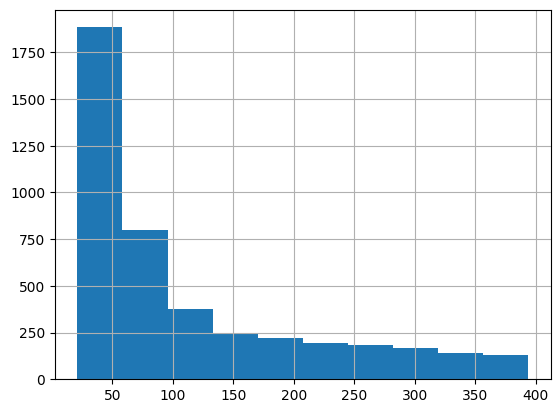

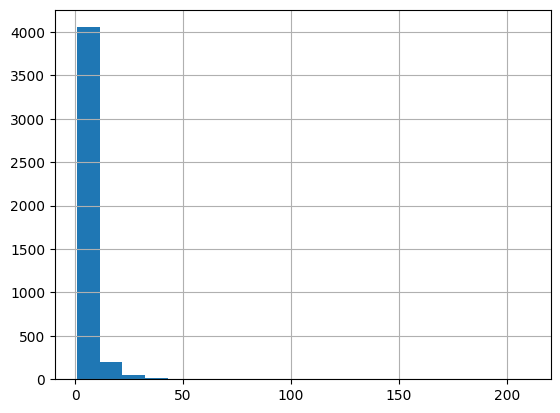

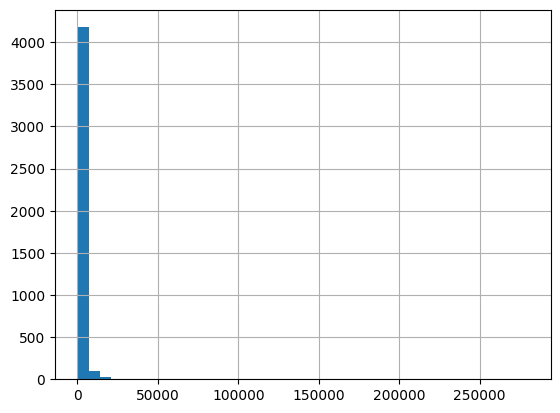

In [10]:
# Create histogram chart to show distribution of recency, frequency and monetary
import matplotlib.pyplot as plt
import seaborn as sns
rfm_score['recency'].hist()
plt.show()
rfm_score['frequency'].hist(bins=20)
plt.show()
rfm_score['monetary'].hist(bins=40)
plt.show()

                  Segment  CustomerID  Percentage
0        Cannot Lose Them          91    2.097257
1               Promising         136    3.134363
2           New Customers         268    6.176538
3          Need Attention         281    6.476147
4          About To Sleep         283    6.522240
5      Potential Loyalist         413    9.518322
6                 At Risk         423    9.748790
7                   Loyal         428    9.864024
8          Lost customers         486   11.200737
9   Hibernating customers         695   16.017516
10              Champions         835   19.244065


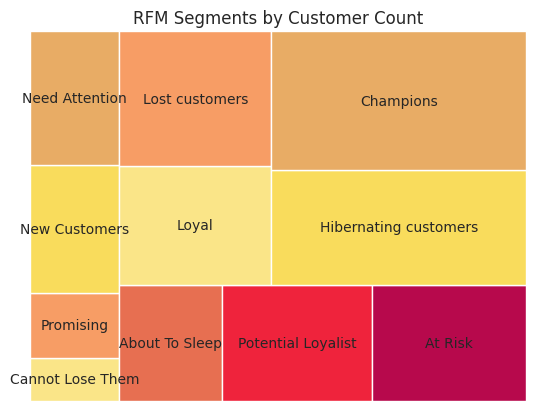

In [11]:
# Count customer in segment
segs_count=rfm_score.groupby('Segment')['CustomerID'].agg('count').sort_values().reset_index()
segs_count['Percentage']=(segs_count['CustomerID']/segs_count['CustomerID'].sum())*100
print(segs_count)
# Create treemap
%pip install squarify
import squarify
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']
sns.set_style(style="whitegrid")
squarify.plot(sizes=segs_count['CustomerID'], label=segs_count['Segment'], color=colors)
plt.title('RFM Segments by Customer Count')
plt.axis('off')
plt.show()

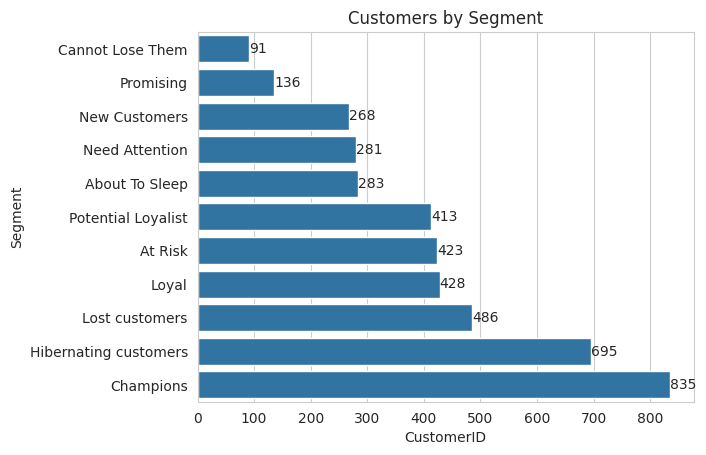

In [12]:
rfm_bar=sns.barplot(segs_count,x='CustomerID',y='Segment')
rfm_bar.bar_label(rfm_bar.containers[0])
plt.title('Customers by Segment')
plt.show()

In [13]:
sales_segment=sales1.merge(rfm_score, on='CustomerID')

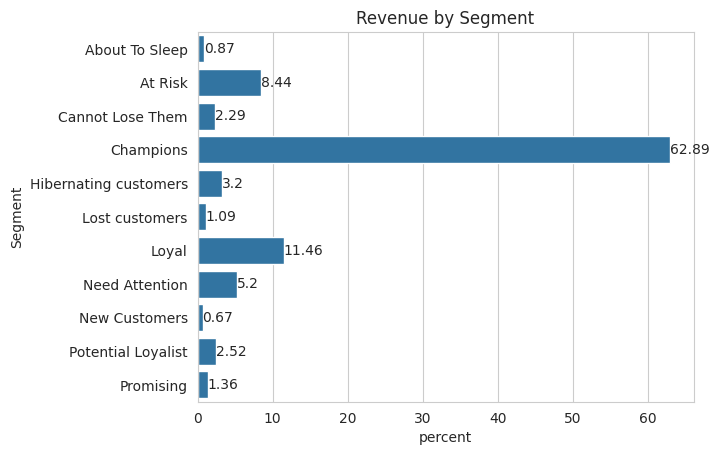

In [14]:
revenue=sales_segment.groupby("Segment")['revenue'].sum().reset_index()
revenue['percent']=round(revenue['revenue']/(revenue['revenue']).agg(sum)*100,2)
revenue_bar=sns.barplot(revenue,x='percent',y='Segment')
revenue_bar.bar_label(revenue_bar.containers[0])
plt.title('Revenue by Segment')
plt.show()

### **6. Insights and Recommendations**

- The company's customers are mainly in the Champions segment with more than 800 people at a rate of 19%. They are new customers who buy frequently and spend the most. This is also the customer segment that generates the main revenue for the company for more than 60% of total revenue. These customers are loyal, willing to spend generously, and likely to make another purchase soon. These are all very potential customers --> Company should take care of and encourage this group of customers to return more by setting up loyalty cards and special incentives for these customers. They are customers we should focus on for gratitude.
- However, there are more than 1,000 customers in the Hibernating customers and Lost customers segment at a rate of 27%. They are customers who have not returned for a long time, have low purchasing volume, purchasing infrequency and small shopping cart value. Lost customers often have buying behavior seeking variety or only buying once to experience and compare with other products and services. However, this number of customers is quite large, if we ignore them, it will cause a big lost of customers -> Company should do market research, find USP (Unique selling point) to convert Lost customer segment, and stimulate customers to buy more.
- The company should also focus on exploiting potential customers such as Loyal, At Risk and Potential Loyalist segment. The two customer segment Loyal and Potential Loyalist account for 19%, this is also the potential customer segment that is easy to convert to the Champions customers.
In addition, At Risk customer segment with 423 customers, at a rate of 9.7%. They are customers who have made frequent purchases before with a fairly average shopping cart value. We can come up with a plan to re-attract this customer base by conducting surveys on the reasons why they stop buying
